<a href="https://colab.research.google.com/github/DennisChangach/getting_started_with_NLP/blob/main/Word_Embedding_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word Embedding Techniques using Embedding Layer in Keras

## Word Embedding Layer
- Sentences
- One Hot Encoding Sentences
- Padding - Post Padding and Pre Padding
- Convert One Hot Encoded values to vectors
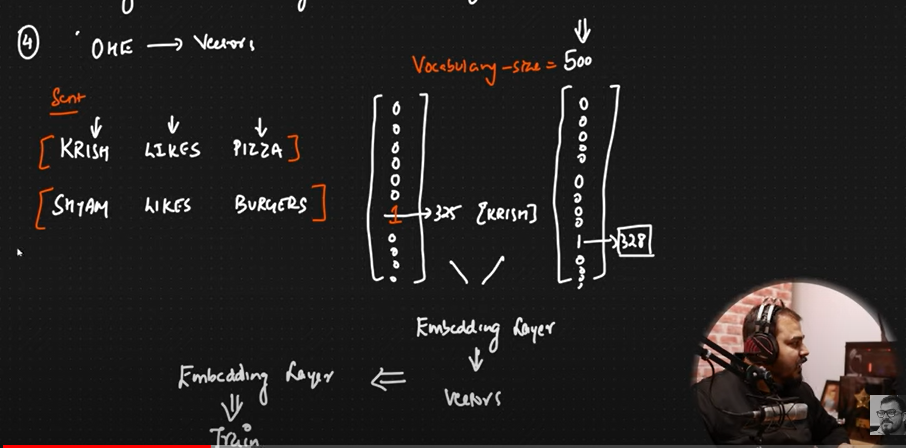

In [3]:
!pip install tensorflow

In [4]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [5]:
from tensorflow.keras.preprocessing.text import one_hot

In [6]:
### sentences
sent=[  'the glass of milk',
     'the glass of juice',
     'the cup of tea',
    'I am a good boy',
     'I am a good developer',
     'understand the meaning of words',
     'your videos are good']

### One Hot Representation

In [8]:
### Vocabulary size
voc_size=500

In [9]:
#--> Returns the index in the vector where the word is present
onehot_repr = [one_hot(words,voc_size) for words in sent]
print(onehot_repr)

[[482, 288, 347, 61], [482, 288, 347, 332], [482, 159, 347, 354], [317, 344, 93, 143, 64], [317, 344, 93, 143, 248], [366, 482, 297, 347, 55], [418, 477, 156, 143]]


### Word Embedding Representation

In [10]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences # For pre&post padding
from tensorflow.keras.models import Sequential

In [11]:
import numpy as np

In [14]:
sent_length = 8
#Applying prepadding on the onehot reprentation
embedded_docs = pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[  0   0   0   0 482 288 347  61]
 [  0   0   0   0 482 288 347 332]
 [  0   0   0   0 482 159 347 354]
 [  0   0   0 317 344  93 143  64]
 [  0   0   0 317 344  93 143 248]
 [  0   0   0 366 482 297 347  55]
 [  0   0   0   0 418 477 156 143]]


In [ ]:
#Feature representation size- Vector Dimension
dim=10

In [15]:
#Building the model
model = Sequential()
#voc_size, 10--> Dimension Size
model.add(Embedding(voc_size,10,input_length=sent_length))
#Adam Optimizer & MSE Loss Function
model.compile('adam','mse')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 8, 10)             5000      
                                                                 
Total params: 5000 (19.53 KB)
Trainable params: 5000 (19.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
##'the glass of milk',
embedded_docs[0]

array([  0,   0,   0,   0, 482, 288, 347,  61], dtype=int32)

In [18]:
model.predict(embedded_docs[0])

1/1 [==============================] - 0s 116ms/step


array([[ 0.00442684,  0.03548144,  0.00092169, -0.03170695,  0.016617  ,
         0.00434383,  0.03362514,  0.01657809,  0.03028509,  0.02748005],
       [ 0.00442684,  0.03548144,  0.00092169, -0.03170695,  0.016617  ,
         0.00434383,  0.03362514,  0.01657809,  0.03028509,  0.02748005],
       [ 0.00442684,  0.03548144,  0.00092169, -0.03170695,  0.016617  ,
         0.00434383,  0.03362514,  0.01657809,  0.03028509,  0.02748005],
       [ 0.00442684,  0.03548144,  0.00092169, -0.03170695,  0.016617  ,
         0.00434383,  0.03362514,  0.01657809,  0.03028509,  0.02748005],
       [-0.01399667,  0.04078332,  0.01804667, -0.01783837,  0.01836488,
        -0.00843543,  0.01797355, -0.01644566,  0.00259216, -0.0203344 ],
       [-0.01629245,  0.02501067, -0.02024376,  0.02890648, -0.04851076,
         0.04655254, -0.00344312, -0.02376167, -0.03237855,  0.00010611],
       [ 0.03454426, -0.04067885, -0.01306236, -0.01052395, -0.00284474,
        -0.01169499,  0.0487646 ,  0.04924712

Test Assignment:

In [20]:
sent=["The world is a better place",
      "Marvel series is my favourite movie",
      "I like DC movies",
      "the cat is eating the food",
      "Tom and Jerry is my favourite movie",
      "Python is my favourite programming language"
      ]

In [21]:
### Vocabulary size
voc_size=500
#--> Returns the index in the vector where the word is present
onehot_repr = [one_hot(words,voc_size) for words in sent]
print(onehot_repr)

[[482, 416, 493, 93, 84, 360], [288, 42, 493, 393, 336, 314], [317, 305, 446, 462], [482, 249, 493, 440, 482, 293], [16, 268, 437, 493, 393, 336, 314], [108, 493, 393, 336, 2, 188]]


In [22]:
sent_length = 10
#Applying prepadding on the onehot reprentation
embedded_docs = pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[  0   0   0   0 482 416 493  93  84 360]
 [  0   0   0   0 288  42 493 393 336 314]
 [  0   0   0   0   0   0 317 305 446 462]
 [  0   0   0   0 482 249 493 440 482 293]
 [  0   0   0  16 268 437 493 393 336 314]
 [  0   0   0   0 108 493 393 336   2 188]]


In [23]:
#Building the model
model = Sequential()
#voc_size, 10--> Dimension Size
model.add(Embedding(voc_size,10,input_length=sent_length))
#Adam Optimizer & MSE Loss Function
model.compile('adam','mse')

In [24]:
#The world is a better place
model.predict(embedded_docs[0])

1/1 [==============================] - 0s 34ms/step


array([[-0.04703301, -0.00815843,  0.02411515,  0.01773519,  0.00399823,
         0.04555546,  0.02301507, -0.03557794,  0.01963359,  0.00461672],
       [-0.04703301, -0.00815843,  0.02411515,  0.01773519,  0.00399823,
         0.04555546,  0.02301507, -0.03557794,  0.01963359,  0.00461672],
       [-0.04703301, -0.00815843,  0.02411515,  0.01773519,  0.00399823,
         0.04555546,  0.02301507, -0.03557794,  0.01963359,  0.00461672],
       [-0.04703301, -0.00815843,  0.02411515,  0.01773519,  0.00399823,
         0.04555546,  0.02301507, -0.03557794,  0.01963359,  0.00461672],
       [ 0.02264397, -0.02392291, -0.04131067, -0.01932833, -0.003698  ,
         0.00161283, -0.03085661, -0.04792028,  0.03107328, -0.00558943],
       [ 0.01023646, -0.00715492, -0.02428483, -0.000501  , -0.03403898,
        -0.02328439,  0.03630737,  0.007244  , -0.01099265, -0.03501073],
       [ 0.01273415,  0.02396842, -0.00042873, -0.03039323, -0.04439776,
         0.00753298, -0.03233369, -0.00606561